# Least squares

A mathematical procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve. The sum of the squares of the offsets is used instead of the offset absolute values because this allows the residuals to be treated as a continuous differentiable quantity. However, because squares of the offsets are used, outlying points can have a disproportionate effect on the fit, a property which may or may not be desirable depending on the problem at hand. 


### Show the data


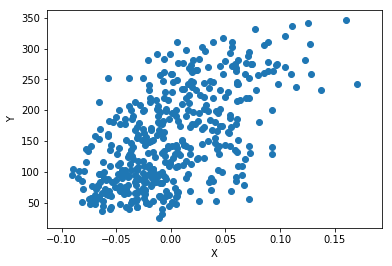

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets

# load data
d = datasets.load_diabetes()

X = d.data[:, 2]
Y = d.target

# draw original data
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### Theory
For $N$ observation data:
$$
\mathbf{X} = \{x_1, x_2, ..., x_N \} \\
\mathbf{Y} = \{y_1, y_2, ..., y_N \}
$$

We want to find the model which can predict the data. The simplest model is linear model, which has the form of 
$$
y = ax + b
$$

The purpose is to find parameters $a, b$ which best fit the model to the observation data. 

We use the sum of squares to measure the differences (loss function) between the model's prediction and observation data:
$$
L = \sum_{i=1}^{N} (y_i - a x_i + b)^2
$$

To make the loss function minimize, we can find the parameters:
$$
\frac{\partial L}{\partial a} = -2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i \\
\frac{\partial L}{\partial b} = -2 \sum_{i=1}^{N} (y_i - a x_i - b)
$$
When the loss is minimized, therefore the partial difference is zero, then we can get:
$$
-2 \sum_{i=1}^{N} (y_i - a x_i - b) x_i = 0 \\
-2 \sum_{i=1}^{N} (y_i - a x_i - b) = 0 \\
$$

We reoder the items as:
$$
a \sum x_i^2 + b \sum x_i = \sum y_i x_i \\
a \sum x_i + b N = \sum y_i
$$
By solving the linear equation we can obtain the model parameters.

### Program

a = 949.435260, b = 152.133484


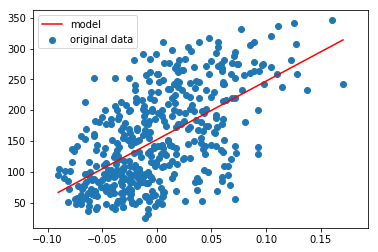

In [14]:
N = X.shape[0]

S_X2 = np.sum(X*X)
S_X  = np.sum(X)
S_XY = np.sum(X*Y)
S_Y  = np.sum(Y)

A1 = np.array([[S_X2, S_X], 
               [S_X, N]])
B1 = np.array([S_XY, S_Y])

coeff = np.linalg.inv(A1).dot(B1)

print('a = %f, b = %f' % (coeff[0], coeff[1]))

x_min = np.min(X)
x_max = np.max(X)
y_min = coeff[0] * x_min + coeff[1]
y_max = coeff[0] * x_max + coeff[1]

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## How to use iterative method to estimate parameters?


epoch    0: loss = 4303817.496892, a = 2.826518, b = 90.332322
epoch    1: loss = 2886806.756007, a = 4.689320, b = 127.204624
epoch    2: loss = 2650260.562182, a = 6.564882, b = 142.423411
epoch    3: loss = 2610244.478756, a = 8.443497, b = 148.704446
epoch    4: loss = 2601826.873313, a = 10.321163, b = 151.296317
epoch    5: loss = 2598022.583256, a = 12.196235, b = 152.365440
epoch    6: loss = 2594693.583475, a = 14.068035, b = 152.806033
epoch    7: loss = 2591324.277053, a = 15.936290, b = 152.987193
epoch    8: loss = 2587904.879022, a = 17.800890, b = 153.061271
epoch    9: loss = 2584465.875668, a = 19.661796, b = 153.091151
epoch   10: loss = 2581025.689621, a = 21.518994, b = 153.102788
epoch   11: loss = 2577592.886376, a = 23.372484, b = 153.106897
epoch   12: loss = 2574171.135769, a = 25.222270, b = 153.107901
epoch   13: loss = 2570761.947715, a = 27.068358, b = 153.107623
epoch   14: loss = 2567365.917653, a = 28.910755, b = 153.106819
epoch   15: loss = 2563983.260

epoch  786: loss = 1758546.292851, a = 752.334224, b = 152.645033
epoch  787: loss = 1758391.764538, a = 752.726329, b = 152.644782
epoch  788: loss = 1758237.851858, a = 753.117651, b = 152.644532
epoch  789: loss = 1758084.552355, a = 753.508190, b = 152.644283
epoch  790: loss = 1757931.863581, a = 753.897948, b = 152.644034
epoch  791: loss = 1757779.783102, a = 754.286926, b = 152.643785
epoch  792: loss = 1757628.308489, a = 754.675127, b = 152.643538
epoch  793: loss = 1757477.437325, a = 755.062552, b = 152.643290
epoch  794: loss = 1757327.167204, a = 755.449202, b = 152.643043
epoch  795: loss = 1757177.495727, a = 755.835078, b = 152.642797
epoch  796: loss = 1757028.420505, a = 756.220183, b = 152.642551
epoch  797: loss = 1756879.939161, a = 756.604518, b = 152.642305
epoch  798: loss = 1756732.049325, a = 756.988085, b = 152.642060
epoch  799: loss = 1756584.748637, a = 757.370884, b = 152.641816
epoch  800: loss = 1756438.034746, a = 757.752918, b = 152.641572
epoch  801

epoch 1267: loss = 1725423.680772, a = 873.550035, b = 152.567613
epoch 1268: loss = 1725400.944319, a = 873.699749, b = 152.567517
epoch 1269: loss = 1725378.298033, a = 873.849164, b = 152.567421
epoch 1270: loss = 1725355.741556, a = 873.998280, b = 152.567326
epoch 1271: loss = 1725333.274530, a = 874.147098, b = 152.567231
epoch 1272: loss = 1725310.896600, a = 874.295618, b = 152.567136
epoch 1273: loss = 1725288.607410, a = 874.443841, b = 152.567042
epoch 1274: loss = 1725266.406608, a = 874.591768, b = 152.566947
epoch 1275: loss = 1725244.293841, a = 874.739399, b = 152.566853
epoch 1276: loss = 1725222.268760, a = 874.886735, b = 152.566759
epoch 1277: loss = 1725200.331014, a = 875.033776, b = 152.566665
epoch 1278: loss = 1725178.480257, a = 875.180523, b = 152.566571
epoch 1279: loss = 1725156.716143, a = 875.326977, b = 152.566478
epoch 1280: loss = 1725135.038326, a = 875.473137, b = 152.566384
epoch 1281: loss = 1725113.446463, a = 875.619006, b = 152.566291
epoch 1282

epoch 1785: loss = 1720413.343564, a = 921.873443, b = 152.536749
epoch 1786: loss = 1720410.408153, a = 921.926526, b = 152.536715
epoch 1787: loss = 1720407.484232, a = 921.979503, b = 152.536681
epoch 1788: loss = 1720404.571755, a = 922.032374, b = 152.536647
epoch 1789: loss = 1720401.670677, a = 922.085140, b = 152.536613
epoch 1790: loss = 1720398.780953, a = 922.137800, b = 152.536580
epoch 1791: loss = 1720395.902538, a = 922.190354, b = 152.536546
epoch 1792: loss = 1720393.035387, a = 922.242804, b = 152.536513
epoch 1793: loss = 1720390.179456, a = 922.295149, b = 152.536479
epoch 1794: loss = 1720387.334700, a = 922.347389, b = 152.536446
epoch 1795: loss = 1720384.501075, a = 922.399524, b = 152.536413
epoch 1796: loss = 1720381.678538, a = 922.451555, b = 152.536379
epoch 1797: loss = 1720378.867044, a = 922.503483, b = 152.536346
epoch 1798: loss = 1720376.066550, a = 922.555306, b = 152.536313
epoch 1799: loss = 1720373.277012, a = 922.607026, b = 152.536280
epoch 1800

epoch 2209: loss = 1719803.454636, a = 937.058640, b = 152.527050
epoch 2210: loss = 1719802.887762, a = 937.081357, b = 152.527035
epoch 2211: loss = 1719802.323051, a = 937.104030, b = 152.527021
epoch 2212: loss = 1719801.760495, a = 937.126657, b = 152.527006
epoch 2213: loss = 1719801.200084, a = 937.149239, b = 152.526992
epoch 2214: loss = 1719800.641811, a = 937.171776, b = 152.526978
epoch 2215: loss = 1719800.085668, a = 937.194267, b = 152.526963
epoch 2216: loss = 1719799.531645, a = 937.216714, b = 152.526949
epoch 2217: loss = 1719798.979736, a = 937.239116, b = 152.526935
epoch 2218: loss = 1719798.429930, a = 937.261473, b = 152.526920
epoch 2219: loss = 1719797.882221, a = 937.283785, b = 152.526906
epoch 2220: loss = 1719797.336601, a = 937.306053, b = 152.526892
epoch 2221: loss = 1719796.793060, a = 937.328276, b = 152.526878
epoch 2222: loss = 1719796.251591, a = 937.350455, b = 152.526863
epoch 2223: loss = 1719795.712185, a = 937.372589, b = 152.526849
epoch 2224

epoch 2784: loss = 1719669.807189, a = 944.825669, b = 152.522089
epoch 2785: loss = 1719669.739411, a = 944.832856, b = 152.522084
epoch 2786: loss = 1719669.671871, a = 944.840028, b = 152.522080
epoch 2787: loss = 1719669.604569, a = 944.847185, b = 152.522075
epoch 2788: loss = 1719669.537504, a = 944.854329, b = 152.522071
epoch 2789: loss = 1719669.470675, a = 944.861458, b = 152.522066
epoch 2790: loss = 1719669.404081, a = 944.868573, b = 152.522062
epoch 2791: loss = 1719669.337721, a = 944.875673, b = 152.522057
epoch 2792: loss = 1719669.271594, a = 944.882760, b = 152.522053
epoch 2793: loss = 1719669.205700, a = 944.889832, b = 152.522048
epoch 2794: loss = 1719669.140037, a = 944.896890, b = 152.522044
epoch 2795: loss = 1719669.074604, a = 944.903934, b = 152.522039
epoch 2796: loss = 1719669.009402, a = 944.910964, b = 152.522035
epoch 2797: loss = 1719668.944428, a = 944.917980, b = 152.522030
epoch 2798: loss = 1719668.879683, a = 944.924982, b = 152.522026
epoch 2799

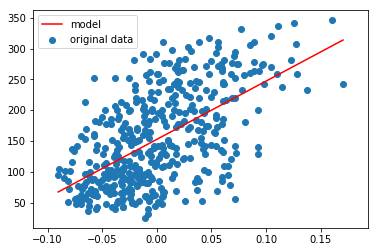

In [21]:
n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y, label='original data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()

## How to show the iterative process

<IPython.core.display.Javascript object>


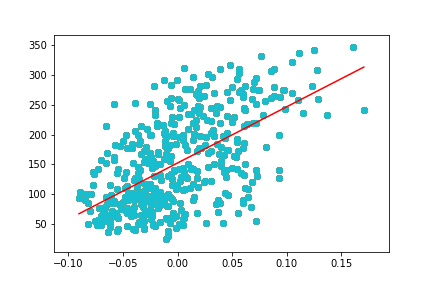

In [25]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation

n_epoch = 3000          # epoch size
a, b = 1, 1             # initial parameters
epsilon = 0.001         # learning rate

fig = plt.figure()
imgs = []

for i in range(n_epoch):
    for j in range(N):
        a = a + epsilon*2*(Y[j] - a*X[j] - b)*X[j]
        b = b + epsilon*2*(Y[j] - a*X[j] - b)

    L = 0
    for j in range(N):
        L = L + (Y[j]-a*X[j]-b)**2
    #print("epoch %4d: loss = %f, a = %f, b = %f" % (i, L, a, b))
    
    if i % 50 == 0:
        x_min = np.min(X)
        x_max = np.max(X)
        y_min = a * x_min + b
        y_max = a * x_max + b

        img = plt.scatter(X, Y, label='original data')
        img = plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
        imgs.append(img)
        
ani = animation.ArtistAnimation(fig, imgs)
plt.show()

## How to use batch update method?

If some data is outliear, then the 

## How to fit polynomial function?

If we observe a missle at some time, then how to estimate the trajectory? Acoording the physical theory, the trajectory can be formulated as:
$$
y = at^2 + bt + c
$$
The we need at least three data to compute the parameters $a, b, c$.



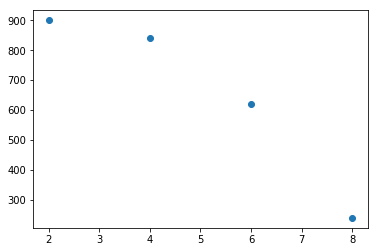

In [4]:
t = np.array([2, 4, 6, 8])
#t = np.linspace(0, 10)

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc


plt.scatter(t, y)
plt.show()

## How to use sklearn to solve linear problem?



a = 949.435260, b = 152.133484


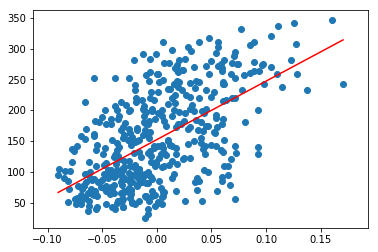

In [5]:
from sklearn import linear_model

# load data
d = datasets.load_diabetes()

X = d.data[:, np.newaxis, 2]
Y = d.target

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b

plt.scatter(X, Y)
plt.plot([x_min, x_max], [y_min, y_max], 'r')
plt.show()

## How to use sklearn to fit polynomial function?

In [6]:
# Fitting polynomial functions

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

t = np.array([2, 4, 6, 8])

pa = -20
pb = 90
pc = 800

y = pa*t**2 + pb*t + pc

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(t[:, np.newaxis], y)
model.named_steps['linear'].coef_


array([800.,  90., -20.])

## How to estimate some missing value by the model?


Y_est  =  [148.6844971  167.17376752 174.36403934 195.93485483 109.65159289
 120.95059148 245.23957594 204.15230835 269.89193649  75.75459712
 241.13084918 104.51568444 141.49422527 126.08649992 208.26103511
 233.94057735 151.76604217 158.956314   161.01067738 228.8046689
 220.58721538 129.16804499 100.40695768 117.86904641 168.2009492
 226.75030552 114.78750134 163.06504076 113.76031965 119.92340979
 157.92913231 237.02212242 120.95059148  98.3525943  123.00495485
 205.17949004  95.27104923 153.82040555 130.19522668  81.91768726
 171.28249427 137.38549851 137.38549851 189.77176469  82.94486895]
Y_test =  [198. 242. 232. 175.  93. 168. 275. 293. 281.  72. 140. 189. 181. 209.
 136. 261. 113. 131. 174. 257.  55.  84.  42. 146. 212. 233.  91. 111.
 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.  48. 178. 104.
 132. 220.  57.]
err = 8.437628 (56.601327), score = 0.422889
a = 953.024850, b = 152.544562


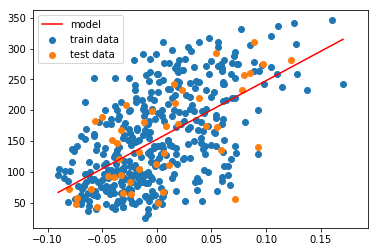

In [9]:
# load data
d = datasets.load_diabetes()

N = d.target.shape[0]
N_train = int(N*0.9)
N_test = N - N_train

X = d.data[:N_train, np.newaxis, 2]
Y = d.target[:N_train]

X_test = d.data[N_train:, np.newaxis, 2]
Y_test = d.target[N_train:]

# create regression model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

Y_est = regr.predict(X_test)
print("Y_est  = ", Y_est)
print("Y_test = ", Y_test)
err = (Y_est - Y_test)**2
err2 = sklearn.metrics.mean_squared_error(Y_test, Y_est)
score = regr.score(X_test, Y_test)
print("err = %f (%f), score = %f" % (np.sqrt(np.sum(err))/N_test, np.sqrt(err2), score))


# plot data
a, b = regr.coef_, regr.intercept_
print("a = %f, b = %f" % (a, b))

x_min = np.min(X)
x_max = np.max(X)
y_min = a * x_min + b
y_max = a * x_max + b


plt.scatter(X, Y, label='train data')
plt.scatter(X_test, Y_test, label='test data')
plt.plot([x_min, x_max], [y_min, y_max], 'r', label='model')
plt.legend()
plt.show()